# Interpolation

Interpolation is the process of defining a function that takes on specified values at specified points. It can be useful for table lookup, plotting, numerical differentiation, numerical integration, etc.

Learning objectives:
 - Construction of interpolating polynomials
 - Construction of piecewise linear interpolation
 - Understand shape-preserving cubic interpolation and cubic Splines

## Interpolating Polynomials

Given $n$ points in the plane, $(x_k, y_k), k = 1, \dots, n$, with distinct $x_k$'s, there is a unique polynomial in $x$ of degree less than $n$ whose graph passes through the points. This polynomial is called the *interpolating polynomial* because it exactly reproduces the given data:
$$P(x_k) = y_k, k = 1,\dots,n.$$

For example,

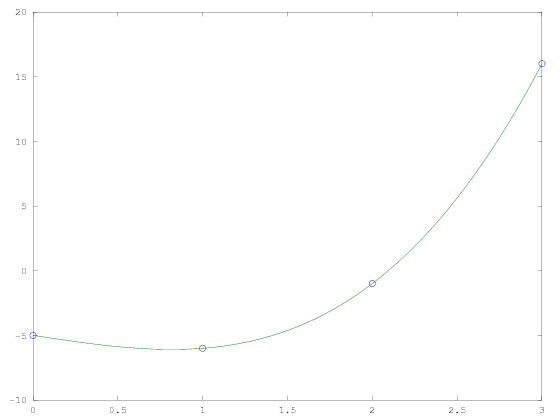

In [1]:
x = 0:3;
y = [-5 -6 -1 16];

% Plot the cubic polynomial that interpolates the give points
plot(x, y, 'o', linspace(0,3), polyval(polyfit(x,y,3), linspace(0,3)), '-')

There are many different formulas for the polynomial, which all define the same function.

One of the most compact representation of the interpolating polynomial is the Lagrange form
$$
P(x) = \sum_{k=1}^n\left(\Pi_{j\neq k}\frac{x-x_j}{x_k-x_j}\right)y_k,
$$
The following function implements the Lagrange form.

In [2]:
function v = lagrangeForm(x,y,u)
% LAGRANGEFORM: takes n points and values in x and y, evaluates the
% interpolating polynomial at u using the Lagrange form
n = length(x);
v = zeros(size(u));
for k = 1:n
   w = ones(size(u));
   for j = [1:k-1 k+1:n]
      w = (u-x(j))./(x(k)-x(j)).*w;
   end
   v = v + w*y(k);
end
end

In [3]:
% Initialization: Load the symbolic package for Octave. 
% This command is not necessary (and would not work) in MATLAB
pkg load symbolic
sym;

OctSymPy v2.5.0: this is free software without warranty, see source.
Initializing communication with SymPy using a popen2() pipe.
Some output from the Python subprocess (pid 261) might appear next.
Python 2.7.12 (default, Nov 19 2016, 06:48:10) 
[GCC 5.4.0 20160609] on linux2
Type "help", "copyright", "credits" or "license" for more information.
>>> >>> 
OctSymPy: Communication established.  SymPy v1.0.


In [4]:
symx = sym('x');
P = lagrangeForm(x, y, symx);
pretty(P)

                                                       ⎛x   1⎞                  
                                                  16⋅x⋅⎜─ - ─⎟⋅(x - 2)          
                 ⎛  x   3⎞   x⋅(-x + 3)⋅(x - 1)        ⎝2   2⎠                  
  - 6⋅x⋅(-x + 2)⋅⎜- ─ + ─⎟ - ────────────────── + ──────────────────── - 5⋅(-x +
                 ⎝  2   2⎠           2                     3                    
  
                         
                         
      ⎛  x    ⎞ ⎛  x    ⎞
   1)⋅⎜- ─ + 1⎟⋅⎜- ─ + 1⎟
      ⎝  2    ⎠ ⎝  3    ⎠


The Lagrange form is not the most convenient for evaluation.

A simpler, and yet more general form, is called the *power form*, which has the format
$$P(x)=c_1x^{n-1} +c_2x^{n-2} +\dots+c_{n-1}x+c_n,$$
where $c_j, j=1, 2, \dots, n$ are constants. 

The power form is particularly convenient to differentiate or integrate. Because of the uniqueness of the interpolating polynomial, we can convert the Lagrange form to the power form.

In [5]:
Q = simplify(P);
pretty(Q)

   3          
  x  - 2⋅x - 5


Here is another example:

In [6]:
x = 1:6;
y = [16 18 21 17 15 12];
P = lagrangeForm(x, y, symx);
pretty(P)

              ⎛  x   3⎞ ⎛  x   4⎞ ⎛  x   5⎞ ⎛  x   6⎞               ⎛  x    ⎞ ⎛ 
  16⋅(-x + 2)⋅⎜- ─ + ─⎟⋅⎜- ─ + ─⎟⋅⎜- ─ + ─⎟⋅⎜- ─ + ─⎟ + 18⋅(-x + 3)⋅⎜- ─ + 2⎟⋅⎜-
              ⎝  2   2⎠ ⎝  3   3⎠ ⎝  4   4⎠ ⎝  5   5⎠               ⎝  2    ⎠ ⎝ 
  
   x   5⎞ ⎛  x   3⎞                       ⎛  x   5⎞ ⎛  x    ⎞ ⎛x   1⎞           
   ─ + ─⎟⋅⎜- ─ + ─⎟⋅(x - 1) + 21⋅(-x + 4)⋅⎜- ─ + ─⎟⋅⎜- ─ + 2⎟⋅⎜─ - ─⎟⋅(x - 2) + 
   3   3⎠ ⎝  4   2⎠                       ⎝  2   2⎠ ⎝  3    ⎠ ⎝2   2⎠           
  
              ⎛  x    ⎞ ⎛x   1⎞ ⎛x    ⎞                       ⎛x   1⎞ ⎛x   2⎞ ⎛x
  17⋅(-x + 5)⋅⎜- ─ + 3⎟⋅⎜─ - ─⎟⋅⎜─ - 1⎟⋅(x - 3) + 15⋅(-x + 6)⋅⎜─ - ─⎟⋅⎜─ - ─⎟⋅⎜─
              ⎝  2    ⎠ ⎝3   3⎠ ⎝2    ⎠                       ⎝4   4⎠ ⎝3   3⎠ ⎝2
  
     3⎞              ⎛x   1⎞ ⎛x   1⎞ ⎛x    ⎞ ⎛x    ⎞        
   - ─⎟⋅(x - 4) + 12⋅⎜─ - ─⎟⋅⎜─ - ─⎟⋅⎜─ - 1⎟⋅⎜─ - 2⎟⋅(x - 5)
     2⎠              ⎝5   5⎠ ⎝4   2⎠ ⎝3    ⎠ ⎝2    ⎠        


Its power form can be obtained by simplifying the above:

In [7]:
Q = simplify(P);
pretty(Q)

        5       4        3        2             
    29⋅x    13⋅x    695⋅x    263⋅x    579⋅x     
  - ───── + ───── - ────── + ────── - ───── + 69
     120      3       24       3        5       


The coefficients in the power form, in principle, can be computed by solving a system of simultaneous linear equations
$$
\left[\begin{array}{ccccc}
x_{1}^{n-1} & x_{1}^{n-2} & \cdots & x_{1} & 1\\
x_{2}^{n-1} & x_{2}^{n-2} & \cdots & x_{2} & 1\\
\vdots & \vdots & \ddots & \vdots & \vdots\\
x_{n}^{n-1} & x_{n}^{n-2} & \cdots & x_{n} & 1
\end{array}\right]\left[\begin{array}{c}
c_{1}\\
c_{2}\\
\vdots\\
c_{n}
\end{array}\right]=\left[\begin{array}{c}
y_{1}\\
y_{2}\\
\vdots\\
y_{n}
\end{array}\right]$$

The matrix above is known as a *Vandermonde* matrix. Its elements are
$$v_{k,j}=x_k ^{n-j}.$$

We can obtain the coefficients by solving the linear equation:

In [8]:
vander(x) \ y'

ans =

    -0.24167
     4.33333
   -28.95833
    87.66667
  -115.80000
    69.00000



which gives numerical solutions. The exact coefficients can also be obtained as follows:

In [9]:
vander(x) \ sym(y)'

ans = (sym 6×1 matrix)

  ⎡ -29  ⎤
  ⎢ ──── ⎥
  ⎢ 120  ⎥
  ⎢      ⎥
  ⎢ 13/3 ⎥
  ⎢      ⎥
  ⎢-695  ⎥
  ⎢───── ⎥
  ⎢  24  ⎥
  ⎢      ⎥
  ⎢263/3 ⎥
  ⎢      ⎥
  ⎢-579/5⎥
  ⎢      ⎥
  ⎣  69  ⎦



This polynomial, however, becomes quite oscillatory, and it may not represent the reality. It will become even more so as the degree of polynomial increases.

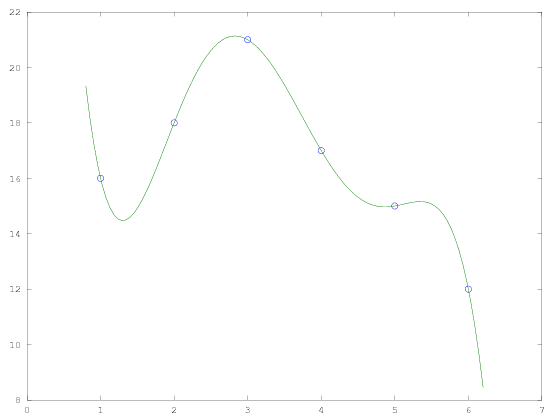

In [10]:
plot(x, y, 'o', linspace(0.8,6.2), lagrangeForm(x,y,linspace(0.8,6.2)), '-')

To overcome the oscillations, one need to use lower-degree polynomials. One approach is to use least-squares fittings, which will be covered in the next module. The MATLAB built-in function for polynomial interpolation is [`polyfit`](https://www.mathworks.com/help/matlab/ref/polyfit.html) also supports least-squares fittings. For example,

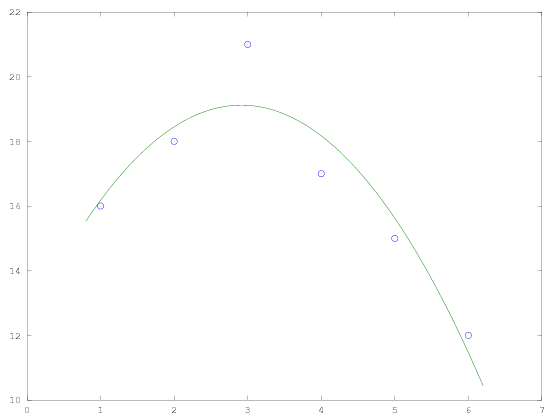

In [11]:
plot(x, y, 'o', linspace(0.8,6.2), polyval(polyfit(x,y,2), linspace(0.8,6.2)), '-')

 Another approach is to use piecewise polynomial interpolation, which we cover next.

## Piecewise Linear Interpolation

MATLAB's graphics routines use piecewise linear interpolation. It is the simplest piecewise interpolation.

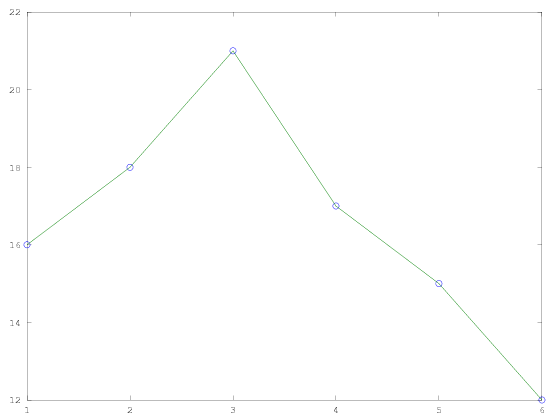

In [12]:
x = 1:6;
y = [16 18 21 17 15 12];
plot(x,y,'o',x,y,'-');

For piecewise interpolation, the nodes $x_i$ must be ordered such that $x_1<x_2<\dots<x_n$. The $k$th subinterval is defined as
$$x_k<x<x_{k+1}.$$
The local variable, $s$, is given by
$$s = x-x_k.$$
Let $h_k$ denote the length of the $k$th subinterval:
$$h_k = x_{k+1}-x_k.$$ 

The first *divided difference* is
$$\delta_k = \frac{y_{k+1} - y_k}{h_k}.$$
With these quantities in hand, the piecewise-linear interpolant is
$$L(x)=y_k + s \delta_k = y_k + (x - x_k)\frac{y_{k+1} - y_k}{x_{k+1} - x_{k}}.$$

The following function implements piecewise-linear interpolation.

In [13]:
function v = piecelin(x,y,u)
%PIECELIN  Piecewise linear interpolation.
%  v = piecelin(x,y,u) finds the piecewise linear L(x)
%  with L(x(j)) = y(j) and returns v(k) = L(u(k)).

%   Copyright 2014 Cleve Moler

%  First divided difference
   delta = diff(y) ./ diff(x);

%  Find subinterval indices k so that x(k) <= u < x(k+1)
   n = length(x);
   k = ones(size(u));
   for j = 2:n-1
      k(x(j) <= u) = j;
   end

%  Evaluate interpolant
   s = u - x(k);
   v = y(k) + s.*delta(k);
end

Plotting the function should produce the same plot as above.

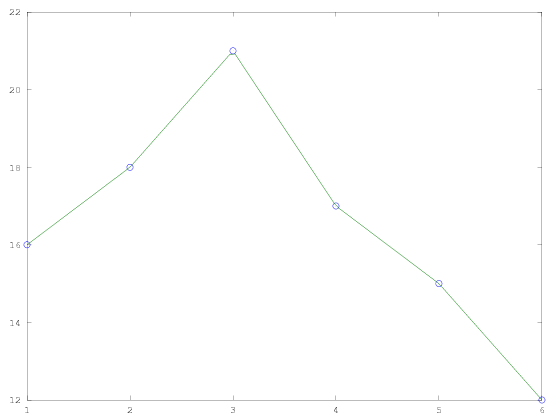

In [14]:
plot(x, y, 'o', linspace(1,6), piecelin(x,y,linspace(1,6)), '-')

The piecewise linear interpolant $L(x)$ is a continuous function of $x$, but its first derivative, $L'(x)$, is not continuous. The derivative has a constant value, $\delta k$, on each subinterval and jumps at $x_k$. This can be overcome using piecewise cubic interpolation.

## Piecewise Cubic Hermite Interpolation

Many of the most effective interpolation techniques are based on piecewise cubic polynomials. 

Consider the $k$th subinterval $x_{k}, \dots, x_{k+1}$. Let $d_k$ denote the slope of the interpolant at $x_k$:
$$d_k =P'(x_k).$$

The *Hermite* or *osculatory cubic polynomial*, satisfies four interpolation conditions:
$$P(x_k) = y_k, P(x_{k+1}) = y_{k+1}, P'(x_k) = d_k, P'(x_{k+1}) = d_{k+1}.$$

For the piecewise linear interpolant, $d_k$ = $\delta_{k-1}$ or $\delta_{k}$, but this is not necessarily true for higher order interpolants.

Again, let $s = x - x_k$ and $h_k = x_{k+1} - x_k$. Then,
$$P(x) = \frac{3hs^2-2s^3}{h^3}y_{k+1} + \frac{h^3-3hs^2 +2s^3}{h^3}y_k
+ \frac{s^2(s - h)}{h^2}d_{k+1} + \frac{s(s - h)^2}{h^2}d_k.$$

If we happen to know both function values and first derivative values at $x_k$'s, then piecewise cubic Hermite interpolation can reproduce those data. In general, the derivative values are unknown. The key question is how to estimate the $d_k$.

### Shape-Preserving Cubic Interpolation

A common strategy is to make the function "shape preserving." The key idea is to determine the slopes $d_k$ so that the function values do not overshoot the data values, at least locally, by setting 


If $\delta_k$ and $\delta_{k-1}$ have opposite signs or if either of them is zero, then $x_k$ is a discrete local minimum or maximum, so we set
$$d_{k}=\begin{cases}
0 & \delta_{k-1}\delta_{k}\leq0\\
\dfrac{(w_{1}+w_{2})\delta_{k-1}\delta_{k}}{w_{2}\delta_{k-1}+w_{1}\delta_{k}} & \text{otherwise},
\end{cases}$$
where 
$$w_1 =2h_k +h_{k-1}, w_2 =h_k +2h_{k-1}.$$

A modified one-sided analysis is needed at end-points. The method is implemented as follows.

In [15]:
function v = pchiptx(x,y,u)
%PCHIPTX  Textbook piecewise cubic Hermite interpolation.
%  v = pchiptx(x,y,u) finds the shape-preserving piecewise cubic
%  interpolant P(x), with P(x(j)) = y(j), and returns v(k) = P(u(k)).
%
%  See PCHIP, SPLINETX.
 
%   Copyright 2014 Cleve Moler

%  First derivatives
 
   h = diff(x);
   delta = diff(y)./h;
   d = pchipslopes(h,delta);

%  Piecewise polynomial coefficients

   n = length(x);
   c = (3*delta - 2*d(1:n-1) - d(2:n))./h;
   b = (d(1:n-1) - 2*delta + d(2:n))./h.^2;

%  Find subinterval indices k so that x(k) <= u < x(k+1)

   k = ones(size(u));
   for j = 2:n-1
      k(x(j) <= u) = j;
   end

%  Evaluate interpolant

   s = u - x(k);
   v = y(k) + s.*(d(k) + s.*(c(k) + s.*b(k)));
end

% -------------------------------------------------------

function d = pchipslopes(h,delta)
%  PCHIPSLOPES  Slopes for shape-preserving Hermite cubic
%  pchipslopes(h,delta) computes d(k) = P'(x(k)).

%  Slopes at interior points
%  delta = diff(y)./diff(x).
%  d(k) = 0 if delta(k-1) and delta(k) have opposites
%         signs or either is zero.
%  d(k) = weighted harmonic mean of delta(k-1) and
%         delta(k) if they have the same sign.

   n = length(h)+1;
   d = zeros(size(h));
   k = find(sign(delta(1:n-2)).*sign(delta(2:n-1))>0)+1;
   w1 = 2*h(k)+h(k-1);
   w2 = h(k)+2*h(k-1);
   d(k) = (w1+w2)./(w1./delta(k-1) + w2./delta(k));

%  Slopes at endpoints

   d(1) = pchipend(h(1),h(2),delta(1),delta(2));
   d(n) = pchipend(h(n-1),h(n-2),delta(n-1),delta(n-2));
end
% -------------------------------------------------------

function d = pchipend(h1,h2,del1,del2)
%  Noncentered, shape-preserving, three-point formula.
   d = ((2*h1+h2)*del1 - h1*del2)/(h1+h2);
   if sign(d) ~= sign(del1)
      d = 0;
   elseif (sign(del1)~=sign(del2))&&(abs(d)>abs(3*del1))
      d = 3*del1;
   end
end

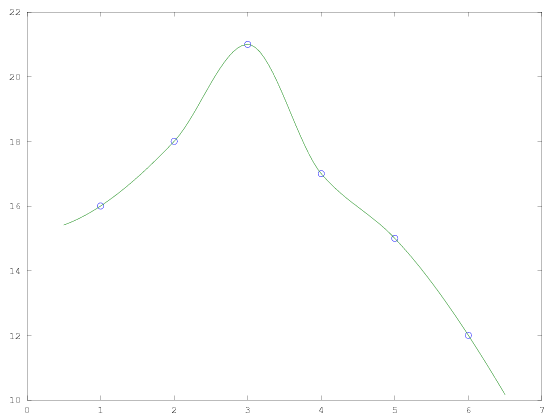

In [16]:
plot(x, y, 'o', linspace(0.5,6.5), pchiptx(x,y,linspace(0.5,6.5)), '-')

The shape-preserving cubic spline is "visually pleasing" and is particularly useful for graphics.

### Cubic Splines

Another popular piecewise cubic interpolation is the *cubic spline*. It has continuous first and second derivative.

Again, let $d_k$ denote the slope of the interpolant at $x_k$, which we will solve based on the continuity of the second derivative. On the $k$th subinterval, the second derivative is a linear function of $s = x - x_k$:
$$P''(x) = \frac{(6h_k-12s)\delta_k + (6s - 2h_k)d_{k+1} + (6s - 4h_k)d_k}{h_k^2}.$$

The one-sided derivative of $P''(x_k)$ in the $k$th subinterval is 
$$P''(x_k+) = \frac{6\delta_k - 2d_{k+1} - 4d_k}{h_k},$$
and that in the $(k-1)$st subinterval is 
$$P''(x_k-) = \frac{-6\delta_{k-1} + 4d_{k} + 2d_{k-1}}{h_{k-1}}.$$
Requiring $P''(x_k+) = P''(x_k-),$ we obtain the equation
$$h_kd_{k - 1} + 2(h_{k - 1} + h_k)d_k + h_{k - 1}d_{k+1} = 3(h_k\delta_{k - 1} + h_{k - 1}\delta_k).$$

This leads to $n - 2$ equations for the interior nodes $x_2, x_3, \dots, x_{n-1}$. One can require subintervals $1$ and $2$ have the same polynomial, and the subintervals $n-2$ and $n-1$ have the same polynomial, respectively. This is known as the "not-a-knot" condition, since the nodes in splines are also called *knots*. This is leads to a tridiagonal linear system
$$
\left[\begin{array}{cccccc}
h_{2} & h_{1}+h_{2}\\
h_{2} & 2(h_{1}+h_{2}) & h_{1}\\
 & h_{3} & 2(h_{2}+h_{3}) & h_{2}\\
 &  & \ddots & \ddots & \ddots\\
 &  &  & h_{n-1} & 2(h_{n-2}+h_{n-1}) & h_{n-2}\\
 &  &  &  & h_{n-2}+h_{n-1} & h_{n-2}
\end{array}\right]\left[\begin{array}{c}
d_{1}\\
d_{2}\\
d_{3}\\
\vdots\\
d_{n-1}\\
d_{n}
\end{array}\right]=3\left[\begin{array}{c}
r_{1}\\
h_{2}\delta_{1}+h_{1}\delta_{2}\\
h_{3}\delta_{2}+h_{2}\delta_{3}\\
\vdots\\
h_{n-1}\delta_{n-2}+h_{n-2}\delta n_{1}\\
r_{n}
\end{array}\right],
$$
where $r_1$ and $r_2$ are associated with the end conditions.

The following code gives the detail of the algorithm.

In [17]:
function v = splinetx(x,y,u)
%SPLINETX  Textbook spline function.
%  v = splinetx(x,y,u) finds the piecewise cubic interpolatory
%  spline S(x), with S(x(j)) = y(j), and returns v(k) = S(u(k)).
%
%  See SPLINE, PCHIPTX.

%   Copyright 2014 Cleve Moler

%  First derivatives

   h = diff(x);
   delta = diff(y)./h;
   d = splineslopes(h,delta);

%  Piecewise polynomial coefficients

   n = length(x);
   c = (3*delta - 2*d(1:n-1) - d(2:n))./h;
   b = (d(1:n-1) - 2*delta + d(2:n))./h.^2;

%  Find subinterval indices k so that x(k) <= u < x(k+1)

   k = ones(size(u));
   for j = 2:n-1
      k(x(j) <= u) = j;
   end

%  Evaluate spline

   s = u - x(k);
   v = y(k) + s.*(d(k) + s.*(c(k) + s.*b(k)));
end

% -------------------------------------------------------

function d = splineslopes(h,delta)
%  SPLINESLOPES  Slopes for cubic spline interpolation.
%  splineslopes(h,delta) computes d(k) = S'(x(k)).
%  Uses not-a-knot end conditions.

%  Diagonals of tridiagonal system

   n = length(h)+1;
   a = zeros(size(h)); b = a; c = a; r = a;
   a(1:n-2) = h(2:n-1);
   a(n-1) = h(n-2)+h(n-1);
   b(1) = h(2);
   b(2:n-1) = 2*(h(2:n-1)+h(1:n-2));
   b(n) = h(n-2);
   c(1) = h(1)+h(2);
   c(2:n-1) = h(1:n-2);

%  Right-hand side

   r(1) = ((h(1)+2*c(1))*h(2)*delta(1)+ ...
          h(1)^2*delta(2))/c(1);
   r(2:n-1) = 3*(h(2:n-1).*delta(1:n-2)+ ...
              h(1:n-2).*delta(2:n-1));
   r(n) = (h(n-1)^2*delta(n-2)+ ...
          (2*a(n-1)+h(n-1))*h(n-2)*delta(n-1))/a(n-1);

%  Solve tridiagonal linear system

   d = tridisolve(a,b,c,r);
end

function x = tridisolve(a,b,c,d)
%   TRIDISOLVE  Solve tridiagonal system of equations.
%     x = TRIDISOLVE(a,b,c,d) solves the system of linear equations
%     b(1)*x(1) + c(1)*x(2) = d(1),
%     a(j-1)*x(j-1) + b(j)*x(j) + c(j)*x(j+1) = d(j), j = 2:n-1,
%     a(n-1)*x(n-1) + b(n)*x(n) = d(n).
%
%   The algorithm does not use pivoting, so the results might
%   be inaccurate if abs(b) is much smaller than abs(a)+abs(c).
%   More robust, but slower, alternatives with pivoting are:
%     x = T\d where T = diag(a,-1) + diag(b,0) + diag(c,1)
%     x = S\d where S = spdiags([[a; 0] b [0; c]],[-1 0 1],n,n)

   x = d;
   n = length(x);

   for j = 1:n-1
      mu = a(j)/b(j);
      b(j+1) = b(j+1) - mu*c(j);
      x(j+1) = x(j+1) - mu*x(j);
   end

   x(n) = x(n)/b(n);
   for j = n-1:-1:1
      x(j) = (x(j)-c(j)*x(j+1))/b(j);
   end
end

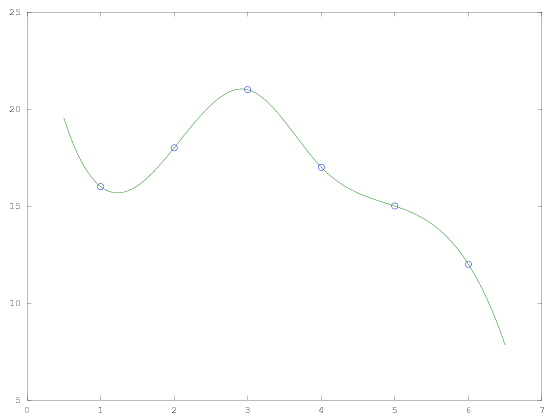

In [18]:
plot(x, y, 'o', linspace(0.5,6.5), splinetx(x,y,linspace(0.5,6.5)), '-')

Cubic splines delivers better accuracy than the shape-preserving cubic interpolation.

Acknowledgment: The material in this Notebook was adapted from Chapter 3 of Numerical Computing with MATLAB by Cleve Moler, 2004.